In [ ]:
''' Shap '''

In [1]:
pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [2]:
!pip install datasets seqeval evaluate transformers torch pytesseract lime scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from PIL import Image, ImageDraw, ImageFont
import evaluate
from transformers import AutoProcessor, LayoutLMv3ForSequenceClassification, set_seed, LayoutLMv3TokenizerFast
from datasets import load_dataset
import transformers as t
import torch
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


set_seed(0)

In [4]:
model = LayoutLMv3ForSequenceClassification.from_pretrained("gordonlim/layoutlmv3-base-finetuned-rvlcdip").to(device)
processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/504M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

In [5]:
# pip install -U datasets
mini_rvl   = load_dataset(
    "dvgodoy/rvl_cdip_mini", split="validation"
)

class_names = {'0': 'letter',
            '1': 'form',
            '2': 'email',
            '3': 'handwritten',
            '4': 'advertisement',
            '5': 'scientific report',
            '6': 'scientific publication',
            '7': 'specification',
            '8': 'file folder',
            '9': 'news article',
            '10': 'budget',
            '11': 'invoice',
            '12': 'presentation',
            '13': 'questionnaire',
            '14': 'resume',
            '15': 'memo'}

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/341M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/42.4M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/41.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3200 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/400 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400 [00:00<?, ? examples/s]

dict_keys(['image', 'width', 'height', 'category', 'ocr_words', 'word_boxes', 'ocr_paragraphs', 'paragraph_boxes', 'label'])
1
['Xlkoros', 'BOOTH TEST DATA', 'ZE', 'SUMMARY SHEET', 'WNLtA', '305', 'PROJECT NO.', 'ouy', 'XEMCEL&"ZHo', 'flbnLEl', 'AxiLa', 'TITLE:', 'TyLEEE Eutux Ae{Eacs', '&Au', '%LuclaxhLL', 'DA', 'Ouihzi IILL', "YeadEster' k", '44', 'DATE;', 'Paired', 'comoirison', 'TEST METHOD: _', 'fIevor', 'deternine', 'differences', 'Scoke', 'PURPOSE:', 'PREPARATION;', 'Mukers', 'Apd_naer', 'Leduced Lghting', 'And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', 'ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', 'NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', '214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '

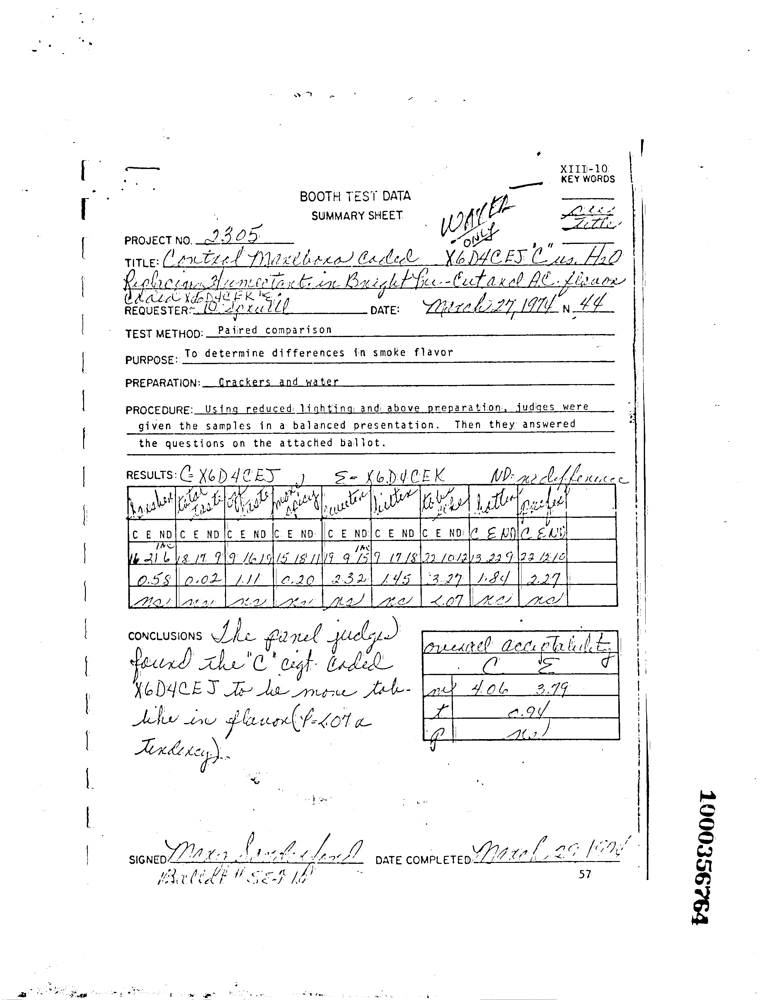

In [6]:
# Take sample from rvl
sample = mini_rvl[100] #104
image = sample['image'].convert("RGB")
words = sample['ocr_words']
bboxes = sample['word_boxes']
print(sample.keys())
print(sample['label'])
print(words)
sample['image']
# FORM

In [7]:
inputs = processor(images=[image], text=[words],boxes=[bboxes], return_tensors="pt")
inputs.to(device)

with torch.no_grad():
    outputs = model(**inputs)
logits = outputs.logits
print(logits)
predicted_class_id = logits.argmax(-1).item()
gt = sample['label']
print(f'pred -> {model.config.id2label[predicted_class_id]} actual -> {gt}')
model.config.id2label[predicted_class_id]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


tensor([[-0.9538,  7.3849, -2.4934, -1.7242, -2.2957,  5.2018, -0.5007, -0.5510,
         -0.2103, -2.0204, -1.0210, -0.6517, -0.3231,  0.0479, -1.1607, -0.4476]],
       device='cuda:0')
pred -> LABEL_1 actual -> 1


'LABEL_1'

In [52]:
print(len(words))
print(len(bboxes))

87
87


In [18]:
delimiter = '|~|'
def safe_split(doc_str):
  return doc_str.split(delimiter)


In [36]:
import shap
from tqdm import tqdm
import numpy as np

MASK = processor.tokenizer.mask_token


def make_predict_fn(model, processor, image, boxes, words):
    """Return a batching function accepted by SHAP."""
    def predict(words_batch):
        """
        words_batch: list of strings, each string is a full document where
                    masked tokens appear as '[MASK]' (inserted by SHAP)
        """
        encs = []
        #print(len(words_batch))
        for doc_str in words_batch:
            words = safe_split(doc_str)                  # same rule as masker
            enc = processor(
                images=[image],
                text=[words],
                boxes=[boxes[:len(words)]],          # keep alignment
                return_tensors="pt",
                padding="max_length",
                truncation=True,
                max_length=128,
            )
            encs.append(enc)

        batch = {k: torch.cat([e[k] for e in encs]).to(device)
                for k in encs[0]}

        with torch.no_grad():
            logits = model(**batch).logits            # (batch, n_classes)
        return torch.softmax(logits, dim=-1).cpu().numpy()
    return predict

In [12]:
print(words)

['Xlkoros', 'BOOTH TEST DATA', 'ZE', 'SUMMARY SHEET', 'WNLtA', '305', 'PROJECT NO.', 'ouy', 'XEMCEL&"ZHo', 'flbnLEl', 'AxiLa', 'TITLE:', 'TyLEEE Eutux Ae{Eacs', '&Au', '%LuclaxhLL', 'DA', 'Ouihzi IILL', "YeadEster' k", '44', 'DATE;', 'Paired', 'comoirison', 'TEST METHOD: _', 'fIevor', 'deternine', 'differences', 'Scoke', 'PURPOSE:', 'PREPARATION;', 'Mukers', 'Apd_naer', 'Leduced Lghting', 'And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', 'ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', 'NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', '214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '642', '2Y4]', '34', 'Ymt', 'SIGNED', 'DATE CCMPLETED', '5']


In [21]:
def sentinel_tokenizer(s, return_offsets_mapping=True, **kw):
    # --------------------------------------------
    # 1️⃣  drop empty fragments so "" -> []
    # --------------------------------------------
    toks = [t for t in s.split(delimiter) if t]      # ← key change
    ids  = list(range(len(toks)))                    # dummy ids

    if return_offsets_mapping:
        offs, pos = [], 0
        for t in toks:
            offs.append((pos, pos + len(t)))
            pos += len(t) + len(delimiter)
        return {"input_ids": ids, "offset_mapping": offs}
    else:
        return {"input_ids": ids}

In [37]:
predict_fn = make_predict_fn(model, processor, image, bboxes, words)
masker = shap.maskers.Text(tokenizer=sentinel_tokenizer,mask_token=processor.tokenizer.mask_token)
explainer = shap.Explainer(predict_fn, masker=masker, algorithm="partition")

doc = delimiter.join(words)


for i in tqdm([doc], desc='SHAPING'):
  vals = explainer([doc],max_evals=1000)
# shap_values = explainer([[1]*len(words)])

SHAPING:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>']
['<mask>']
87
['Xlkoros|~|BOOTH TEST DATA|~|ZE|~|SUMMARY SHEET|~|WNLtA|~|305|~|PROJECT NO.|~|ouy|~|XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~|Ouihzi IILL|~|YeadEster\' k|~|44|~|DATE;|~|Paired|~|comoirison|~|TEST METHOD: _|~|fIevor|~|deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~|And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~|ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~|NAUuui|~|RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~|214|~|44|~|t|~|~k|~|Fanul|~|CONCLUSIONS|~|Ouutl_Ac4LlE|~|Qul zk_"\' cigt:|~|X6D4LEJ T|~|tsl-|~|Jol|~|my|~|#ouo(pton _|~|Llu _|~|Ilkzp)|~|[|~|642|~|2Y4]|~|34|~|Ymt|~|SIGNED|~|DATE CCMPLETED|~|5']
['Xlkoros', 'BOOTH TEST DATA', 'ZE', 'SUMMARY SHEET', 'WNLtA', '305', 'PROJECT NO.', 'ouy', 'XEMCEL&"ZHo', 'flbnLEl', 'AxiLa', 

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>WNLtA', '305', 'PROJECT NO.', 'ouy', ' <mask>']
87
["<mask>Ouihzi IILL|~|YeadEster' k|~|44|~|DATE;|~| <mask>"
 '<mask>Paired|~|comoirison|~|TEST METHOD: _|~|fIevor|~| <mask>'
 '<mask>X6D4LEJ T|~|tsl-|~|Jol|~|my|~|#ouo(pton _|~|Llu _|~|Ilkzp)|~|[|~| <mask>'
 '<mask>642|~|2Y4]|~|34|~|Ymt|~|SIGNED|~|DATE CCMPLETED|~|5'
 '<mask>XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~| <mask>'
 '<mask>TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~| <mask>']
['<mask>Ouihzi IILL', "YeadEster' k", '44', 'DATE;', ' <mask>']
87
['<mask>Paired', 'comoirison', 'TEST METHOD: _', 'fIevor', ' <mask>']
87
['<mask>X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', ' <mask>']
87
['<mask>642', '2Y4]', '34', 'Ymt', 'SIGNED', 'DATE CCMPLETED', '5']
87
['<mask>XEMCEL&"ZHo', 'flbnLEl', 'AxiLa', 'TITLE:', ' <mask>']
87
['<mask>TyLEEE Eutux Ae{Eacs', '&Au', '%LuclaxhLL', 'DA', ' <mask>']
87
['<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~| <mask>ba]lot|~|

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', ' <mask>the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', 'NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', ' <mask>']
87
['<mask>And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', ' <mask>ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', 'NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', ' <mask>']
87
['<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~|ba]lot|~|auts|~| <mask>NAUuui|~|RESULTS:|~|kuv|~|1.u|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&

  0%|          | 0/998 [00:00<?, ?it/s]

['<mask>Ouutl_Ac4LlE|~| <mask>' '<mask>Qul zk_"\' cigt:|~| <mask>'
 '<mask>WNLtA|~|305|~|PROJECT NO.|~| <mask>XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~| <mask>'
 '<mask>WNLtA|~|305|~| <mask>ouy|~|XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~| <mask>'
 "<mask>Ouihzi IILL|~|YeadEster' k|~|44|~| <mask>"
 "<mask>Ouihzi IILL|~|YeadEster' k|~| <mask>DATE;|~| <mask>"]
['<mask>Ouutl_Ac4LlE', ' <mask>']
87
['<mask>Qul zk_"\' cigt:', ' <mask>']
87
['<mask>WNLtA', '305', 'PROJECT NO.', ' <mask>XEMCEL&"ZHo', 'flbnLEl', 'AxiLa', 'TITLE:', 'TyLEEE Eutux Ae{Eacs', '&Au', '%LuclaxhLL', 'DA', ' <mask>']
87
['<mask>WNLtA', '305', ' <mask>ouy', 'XEMCEL&"ZHo', 'flbnLEl', 'AxiLa', 'TITLE:', 'TyLEEE Eutux Ae{Eacs', '&Au', '%LuclaxhLL', 'DA', ' <mask>']
87
['<mask>Ouihzi IILL', "YeadEster' k", '44', ' <mask>']
87
['<mask>Ouihzi IILL', "YeadEster' k", ' <mask>DATE;', ' <mask>']
87
['<mask>And_ahave_nrepardlloa L_|~|judges|

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '642', '2Y4]', '34', 'Ymt', 'SIGNED', 'DATE CCMPLETED', ' <mask>']
87
['<mask>X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '642', '2Y4]', '34', 'Ymt', ' <mask>5']
87
['<mask>TyLEEE Eutux Ae{Eacs', '&Au', ' <mask>']
87
['<mask>%LuclaxhLL', 'DA', ' <mask>']
87
['<mask>Paired|~|comoirison|~| <mask>deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~| <mask>'
 '<mask>TEST METHOD: _|~|fIevor|~|deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~| <mask>'
 '<mask>deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~| <mask>Apd_naer|~|Leduced Lghting|~| <mask>'
 '<mask>deternine|~|differences|~|Scoke|~|PURPOSE:|~| <mask>Mukers|~|Apd_naer|~|Leduced Lghting|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~| <mask>'
 '<mask>PROCEOURE:|~|Walng|~| <mask>']
['<mask>Paired', 'comoirison', ' <mas

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>NAUuui|~| <mask>Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>RESULTS:|~| <mask>Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>X6D4LEJ T|~|tsl-|~|Jol|~|my|~| <mask>'
 '<mask>#ouo(pton _|~|Llu _|~|Ilkzp)|~|[|~| <mask>'
 '<mask>Paired|~|comoirison|~| <mask>deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~|And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~|ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~|NAUuui|~|RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~|214|~|44|~|t|~|~k|~|Fanul|~|CONCLUSIONS|~|Ouutl_Ac4LlE|~|Qul zk_"\' cigt:|~|X6D4LEJ T|~|tsl-|~|Jol|~|my|~|#ouo(pton _|~|Llu _|~|Ilkzp)|~|[|~|642|~|2Y4]|~|34|~|Ymt|~|SIGNED|~|DATE CCMPLETED|~|5'
 '<mask>TEST METHOD: _|~|fIevor|~|deternine|~|differences|~|Scoke|~|PURPOSE:|~|

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>214', '44', ' <mask>~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', ' <mask>']
87
['<mask>214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', ' <mask>SIGNED', 'DATE CCMPLETED', ' <mask>']
87
['<mask>214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', ' <mask>5']
87
['<mask>SIGNED|~| <mask>' '<mask>DATE CCMPLETED|~| <mask>'
 '<mask>NAUuui|~| <mask>kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>Paired|~| <mask>' '<mask>comoirison|~| <mask>']
['<mask>SIGNED', ' <mask>']
87
['<mask>DATE CCMPLETED', ' <mask>']
87
['<mask>NAUuui', ' <mask>kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>lLi LSLLi', 'Joa', ' <mask>']
87
['<mask>LisL', '0402', ' <mask>']
87
['<mask>X6D4LEJ T|~|tsl-|~|Jol|~|my|~|#ouo(pton _|~|Llu _|~|Ilkzp)|~|[|~| <mask>SIGNED|~| <mask>5'
 '<mask>X6D4LEJ T|~|tsl-|~|Jol|~|my|~|#ouo(pton _|~|Llu _|~|Ilkzp)|~|[|~| <mask>DATE CCMPLETED|~|5'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~| <mask>X6D4ET|~| <mask>NAUuui|~|RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~| <mask>2_XLDJCE|~|NAUuui|~|RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>Maul"|~|412|~| <mask>lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>TEST METHOD: _|~| <mask>deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~| <mask>'
 '<mask>fIevor|~|deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~| <mask>NAUuui|~| <mask>Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~| <mask>RESULTS:|~| <mask>Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~|ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~|NAUuui|~|

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', ' <mask>Qul zk_"\' cigt:', ' <mask>']
87
['<mask>insvered', '5amd| E $', ' <mask>the', 'Vions', 'the', 'ched', ' <mask>']
87
['<mask>ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', ' <mask>']
87
['<mask>214', '44', 't', '~k', 'Fanul', ' <mask>']
87
['<mask>214', '44', 't', '~k', ' <mask>CONCLUSIONS', ' <mask>']
87
['Xlkoros|~|BOOTH TEST DATA|~|ZE|~| <mask>WNLtA|~|305|~|PROJECT NO.|~|ouy|~|XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~| <mask>'
 'Xlkoros|~|BOOTH TEST DATA|~| <mask>SUMMARY SHEET|~|WNLtA|~|305|~|PROJECT NO.|~|ouy|~|XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~| <mask>'
 '<mask>NAUuui|~|RESULTS:|~| <mask>' '<mask>kuv|~|1.u|~| <mask>'
 '<mask>XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~| <mask>Ouihzi IILL|~|YeadEster\' k|~|44|~|DATE;|~|Paired|~|comoirison|~|TEST METHOD: _|~|fIevor|~|deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATI

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>Ouihzi IILL', "YeadEster' k", '44', 'DATE;', ' <mask>comoirison', 'TEST METHOD: _', 'fIevor', ' <mask>']
87
['<mask>Ouihzi IILL', "YeadEster' k", '44', 'DATE;', ' <mask>TEST METHOD: _', ' <mask>']
87
['<mask>Ouihzi IILL', "YeadEster' k", '44', 'DATE;', ' <mask>fIevor', ' <mask>']
87
['<mask>And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', 'ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', ' <mask>NAUuui', ' <mask>']
87
['<mask>And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', 'ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', ' <mask>RESULTS:', ' <mask>']
87
['<mask>WNLtA|~| <mask>PROJECT NO.|~|ouy|~|XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~| <mask>'
 '<mask>305|~|PROJECT NO.|~|ouy|~|XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~| <mask>'
 '<mask>ba]lot|

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>Ouihzi IILL', "YeadEster' k", '44', 'DATE;', ' <mask>TEST METHOD: _', 'fIevor', 'deternine', 'differences', 'Scoke', 'PURPOSE:', 'PREPARATION;', 'Mukers', 'Apd_naer', 'Leduced Lghting', 'And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', 'ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', 'NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', '214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '642', '2Y4]', '34', 'Ymt', 'SIGNED', 'DATE CCMPLETED', '5']
87
['<mask>Ouihzi IILL', "YeadEster' k", '44', 'DATE;', 'Paired', 'comoirison', ' <mask>deternine', 'differences', 'Scoke', 'PURPOSE:', 'PREPARATION;', 'Mukers', 'Apd_naer', 'Leduced Lghting', ' <mask>']
87
['<mask>Ouihzi IILL', "YeadEster' k", '44', 'DATE;', ' <ma

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['Xlkoros|~|BOOTH TEST DATA|~|ZE|~| <mask>'
 'Xlkoros|~|BOOTH TEST DATA|~| <mask>SUMMARY SHEET|~| <mask>'
 '<mask>214|~|44|~|t|~|~k|~|Fanul|~|CONCLUSIONS|~|Ouutl_Ac4LlE|~|Qul zk_"\' cigt:|~| <mask>642|~|2Y4]|~|34|~|Ymt|~|SIGNED|~| <mask>5'
 '<mask>214|~|44|~|t|~|~k|~|Fanul|~|CONCLUSIONS|~|Ouutl_Ac4LlE|~|Qul zk_"\' cigt:|~| <mask>642|~|2Y4]|~|34|~|Ymt|~| <mask>DATE CCMPLETED|~|5'
 'Xlkoros|~|BOOTH TEST DATA|~|ZE|~|SUMMARY SHEET|~|WNLtA|~|305|~|PROJECT NO.|~|ouy|~|XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~|Ouihzi IILL|~|YeadEster\' k|~|44|~|DATE;|~| <mask>deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~| <mask>'
 'Xlkoros|~|BOOTH TEST DATA|~|ZE|~|SUMMARY SHEET|~|WNLtA|~|305|~|PROJECT NO.|~|ouy|~|XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~| <mask>Paired|~|comoirison|~|TEST METHOD: _|~|fIevor|~|deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['Xlkoros', 'BOOTH TEST DATA', ' <mask>SUMMARY SHEET', 'WNLtA', '305', 'PROJECT NO.', 'ouy', ' <mask>Ouihzi IILL', "YeadEster' k", '44', 'DATE;', 'Paired', 'comoirison', 'TEST METHOD: _', 'fIevor', 'deternine', 'differences', 'Scoke', 'PURPOSE:', 'PREPARATION;', 'Mukers', 'Apd_naer', 'Leduced Lghting', 'And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', 'ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', 'NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', '214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '642', '2Y4]', '34', 'Ymt', 'SIGNED', 'DATE CCMPLETED', '5']
87
['<mask>Paired', ' <mask>deternine', 'differences', 'Scoke', 'PURPOSE:', 'PREPARATION;', 'Mukers', 'Apd_naer', 'Leduced Lghting', ' <mask>']
87
['<mask>

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>Ilkzp)', '[', ' <mask>']
87
['<mask>And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', 'ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', 'NAUuui', ' <mask>Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', ' <mask>']
87
['<mask>And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', 'ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', ' <mask>RESULTS:', ' <mask>Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', ' <mask>']
87
['<mask>Ouihzi IILL|~|YeadEster\' k|~|44|~|DATE;|~|Paired|~|comoirison|~|TEST METHOD: _|~|fIevor|~|deternine|~|differences|~| <mask>PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~|And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|or

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>the|~|Vions|~| <mask>' '<mask>the|~|ched|~| <mask>'
 '<mask>ba]lot|~|auts|~| <mask>Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>X6D4ET|~|2_XLDJCE|~| <mask>Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~| <mask>NAUuui|~| <mask>Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~|214|~|44|~|t|~|~k|~|Fanul|~|CONCLUSIONS|~|Ouutl_Ac4LlE|~|Qul zk_"\' cigt:|~|X6D4LEJ T|~|tsl-|~|Jol|~|my|~|#ouo(pton _|~|Llu _|~|Ilkzp)|~|[|~|642|~|2Y4]|~|34|~|Ymt|~|SIGNED|~|DATE CCMPLETED|~|5'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~| <mask>RESULTS:|~| <mask>Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~|214|~|44|~|t|~|~k|

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', 'ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', 'NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', '214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '642', '2Y4]', '34', 'Ymt', 'SIGNED', 'DATE CCMPLETED', '5']
87
['<mask>And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', ' <mask>the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', 'NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', '214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '642', '2Y4]', '3

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~| <mask>ba/&nced|~| <mask>the|~|Vions|~|the|~|ched|~|ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~|NAUuui|~|RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~|214|~|44|~|t|~|~k|~|Fanul|~|CONCLUSIONS|~|Ouutl_Ac4LlE|~|Qul zk_"\' cigt:|~|X6D4LEJ T|~|tsl-|~|Jol|~|my|~|#ouo(pton _|~|Llu _|~|Ilkzp)|~|[|~|642|~|2Y4]|~|34|~|Ymt|~|SIGNED|~|DATE CCMPLETED|~|5'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~| <mask>oresenta|~|the|~|Vions|~|the|~|ched|~|ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~|NAUuui|~|RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~|214|~|44|~|t|~|~k|~|Fanul|~|CONCLUSIONS|~|Ouutl_Ac4LlE|~|Qul zk_"\' cigt:|~|X6D4LEJ T|~|tsl-|~|Jol|~|my|~|#ouo(pton _|~|Llu _|~|Ilkzp)|~|[|~|642|~|2Y4]|~|34|~|Ymt|~|SIGNED|~|DATE CCMPLETED|~|5'
 '<mask>HGIL|~|Lion|~| <mask>ba]lot|~|auts|~|X6D4ET|~|2_XLDJC

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>ba]lot', 'auts', ' <mask>NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', '214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '642', '2Y4]', '34', 'Ymt', 'SIGNED', 'DATE CCMPLETED', '5']
87
['<mask>X6D4ET', '2_XLDJCE', 'NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', '214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '642', '2Y4]', '34', 'Ymt', 'SIGNED', 'DATE CCMPLETED', '5']
87
['<mask>Maul"', '412', ' <mask>lLi LSLLi', 'Joa', 'LisL', '0402', '214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', '642', '2Y4]', '34', 'Ymt', 'SIGNED', 'DATE CCMPLETE

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>ZE|~| <mask>Ouihzi IILL|~|YeadEster\' k|~|44|~|DATE;|~|Paired|~|comoirison|~|TEST METHOD: _|~|fIevor|~|deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~|And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~|ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~|NAUuui|~|RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~|214|~|44|~|t|~|~k|~|Fanul|~|CONCLUSIONS|~|Ouutl_Ac4LlE|~|Qul zk_"\' cigt:|~|X6D4LEJ T|~|tsl-|~|Jol|~|my|~|#ouo(pton _|~|Llu _|~|Ilkzp)|~|[|~|642|~|2Y4]|~|34|~|Ymt|~|SIGNED|~|DATE CCMPLETED|~|5'
 '<mask>SUMMARY SHEET|~| <mask>Ouihzi IILL|~|YeadEster\' k|~|44|~|DATE;|~|Paired|~|comoirison|~|TEST METHOD: _|~|fIevor|~|deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~|And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|in

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~| <mask>'
 '<mask>Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~| <mask>0402|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~|ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~|NAUuui|~| <mask>kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~|ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~| <mask>RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~| <mask>the|~|Vions|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~| <mask>the|~|ch

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>auts', ' <mask>NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', ' <mask>']
87
['<mask>Maul"', '412', 'a uilc_:LD', ' <mask>lLi LSLLi', 'Joa', 'LisL', '0402', ' <mask>']
87
['<mask>Maul"', '412', ' <mask>21114', 'lLi LSLLi', 'Joa', 'LisL', '0402', ' <mask>']
87
['Xlkoros', 'BOOTH TEST DATA', 'ZE', 'SUMMARY SHEET', 'WNLtA', '305', 'PROJECT NO.', 'ouy', 'XEMCEL&"ZHo', 'flbnLEl', 'AxiLa', 'TITLE:', 'TyLEEE Eutux Ae{Eacs', '&Au', '%LuclaxhLL', 'DA', 'Ouihzi IILL', "YeadEster' k", '44', 'DATE;', 'Paired', 'comoirison', ' <mask>deternine', 'differences', 'Scoke', 'PURPOSE:', 'PREPARATION;', 'Mukers', 'Apd_naer', 'Leduced Lghting', 'And_ahave_nrepardlloa L_', 'judges', 'PROCEOURE:', 'Walng', 'HGIL', 'Lion', 'Then', 'ney', 'insvered', '5amd| E $', 'ba/&nced', 'oresenta', 'the', 'Vions', 'the', 'ched', 'ba]lot', 'auts', 'X6D4ET', '2_XLDJCE', 'NAUuui', 'RESULTS:', 'kuv', '1.u', 'Maul"', '412', 'a uilc_:LD', '21114', 'lLi LSLLi',

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>X6D4LEJ T|~| <mask>Jol|~|my|~| <mask>'
 '<mask>tsl-|~|Jol|~|my|~| <mask>'
 'Xlkoros|~|BOOTH TEST DATA|~|ZE|~|SUMMARY SHEET|~| <mask>XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~|Ouihzi IILL|~|YeadEster\' k|~|44|~|DATE;|~|Paired|~|comoirison|~|TEST METHOD: _|~|fIevor|~|deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~| <mask>'
 '<mask>WNLtA|~|305|~|PROJECT NO.|~|ouy|~|XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~|Ouihzi IILL|~|YeadEster\' k|~|44|~|DATE;|~|Paired|~|comoirison|~|TEST METHOD: _|~|fIevor|~|deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~| <mask>'
 'Xlkoros|~|BOOTH TEST DATA|~|ZE|~|SUMMARY SHEET|~| <mask>PROJECT NO.|~| <mask>XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~| <mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|T

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~| <mask>ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~|NAUuui|~|RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~| <mask>5amd| E $|~| <mask>ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~|NAUuui|~|RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~| <mask>'
 '<mask>WNLtA|~| <mask>XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~| <mask>'
 '<mask>305|~| <mask>XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~| <mask>'
 'Xlkoros|~|BOOTH TEST DATA|~|ZE|~|SUMMARY SHEET|~|WNLtA|~|305|~|PROJECT NO.|~|ouy|~|XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~|Ouihzi IILL|~|YeadEster\' k|~|44|~|DATE;|~|Paired|~|comoirison|~|TEST MET

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


['<mask>214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', ' <mask>Ilkzp)', '[', '642', '2Y4]', '34', 'Ymt', 'SIGNED', 'DATE CCMPLETED', '5']
87
['<mask>214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', ' <mask>Llu _', 'Ilkzp)', '[', '642', '2Y4]', '34', 'Ymt', 'SIGNED', 'DATE CCMPLETED', '5']
87
['<mask>214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', ' <mask>34', ' <mask>SIGNED', 'DATE CCMPLETED', '5']
87
['<mask>214', '44', 't', '~k', 'Fanul', 'CONCLUSIONS', 'Ouutl_Ac4LlE', 'Qul zk_"\' cigt:', 'X6D4LEJ T', 'tsl-', 'Jol', 'my', '#ouo(pton _', 'Llu _', 'Ilkzp)', '[', ' <mask>Ymt', 'SIGNED', 'DATE CCMPLETED', '5']
87
['<mask>ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~|NAUuui|~| <mask>Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|


PartitionExplainer explainer: 2it [00:44, 44.73s/it]               
SHAPING: 100%|██████████| 1/1 [00:44<00:00, 44.74s/it]


In [38]:
print(vals)

.values =
array([[[-4.39257360e-06, -1.88881294e-02,  2.18250281e-06, ...,
          9.81549749e-05, -2.62594966e-06, -4.68862063e-05],
        [-7.09607916e-05, -1.06829010e-02, -6.52300221e-06, ...,
         -3.30756232e-05, -1.57843651e-04, -1.67470111e-04],
        [-3.09306564e-05,  6.72523671e-02, -6.84540348e-06, ...,
         -1.04862644e-04, -7.89542469e-07, -9.50549297e-05],
        ...,
        [-1.35947346e-04,  6.50206931e-02, -1.22652354e-05, ...,
         -2.90524469e-03, -4.94243746e-04,  1.20476137e-04],
        [ 4.62492670e-05,  5.70639629e-02, -9.53839251e-06, ...,
         -3.64473226e-03, -3.65467524e-04,  6.79922694e-04],
        [-3.50347142e-05, -5.79807878e-04, -3.55390347e-06, ...,
         -3.12871038e-04,  1.36867461e-05,  1.53205735e-05]]])

.base_values =
array([[1.17730408e-03, 1.85998306e-01, 2.72727106e-04, 5.57351334e-04,
        7.91644619e-04, 7.09652543e-01, 1.22344857e-02, 1.16793653e-02,
        1.69374689e-03, 1.07861049e-02, 1.29689453e-02, 1.0

In [39]:
import numpy as np
import pandas as pd

# 0️⃣  grab the single-document explanation you just produced
shap_out = vals[0]                    # shap.Explanation object

# 1️⃣  decide which class you care about
probs        = predict_fn([doc])[0]   # reuse your predictor
pred_cls_idx = probs.argmax()         # index of the predicted class
print(f"Predicted class = {pred_cls_idx}  (p = {probs[pred_cls_idx]:.3f})")

# 2️⃣  pair every token with its SHAP value for that class
tokens   = safe_split(doc)            # same splitter you used in predict()
scores   = shap_out.values[:, pred_cls_idx]

# 3️⃣  sort by absolute contribution and show the top-k
k = 20                                # how many to display
top_idx   = np.argsort(np.abs(scores))[::-1][:k]

table = pd.DataFrame({
    "token" : [tokens[i] for i in top_idx],
    "SHAP"  : scores[top_idx]
})

print(table.to_string(index=False, justify="right", float_format="%.4f"))

['Xlkoros|~|BOOTH TEST DATA|~|ZE|~|SUMMARY SHEET|~|WNLtA|~|305|~|PROJECT NO.|~|ouy|~|XEMCEL&"ZHo|~|flbnLEl|~|AxiLa|~|TITLE:|~|TyLEEE Eutux Ae{Eacs|~|&Au|~|%LuclaxhLL|~|DA|~|Ouihzi IILL|~|YeadEster\' k|~|44|~|DATE;|~|Paired|~|comoirison|~|TEST METHOD: _|~|fIevor|~|deternine|~|differences|~|Scoke|~|PURPOSE:|~|PREPARATION;|~|Mukers|~|Apd_naer|~|Leduced Lghting|~|And_ahave_nrepardlloa L_|~|judges|~|PROCEOURE:|~|Walng|~|HGIL|~|Lion|~|Then|~|ney|~|insvered|~|5amd| E $|~|ba/&nced|~|oresenta|~|the|~|Vions|~|the|~|ched|~|ba]lot|~|auts|~|X6D4ET|~|2_XLDJCE|~|NAUuui|~|RESULTS:|~|kuv|~|1.u|~|Maul"|~|412|~|a uilc_:LD|~|21114|~|lLi LSLLi|~|Joa|~|LisL|~|0402|~|214|~|44|~|t|~|~k|~|Fanul|~|CONCLUSIONS|~|Ouutl_Ac4LlE|~|Qul zk_"\' cigt:|~|X6D4LEJ T|~|tsl-|~|Jol|~|my|~|#ouo(pton _|~|Llu _|~|Ilkzp)|~|[|~|642|~|2Y4]|~|34|~|Ymt|~|SIGNED|~|DATE CCMPLETED|~|5']
['Xlkoros', 'BOOTH TEST DATA', 'ZE', 'SUMMARY SHEET', 'WNLtA', '305', 'PROJECT NO.', 'ouy', 'XEMCEL&"ZHo', 'flbnLEl', 'AxiLa', 'TITLE:', 'TyLEEE Eutux A

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
